In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output
from importlib import reload
import copy
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))
import os
from pathlib import Path
import time

import magpyx
from magpyx.utils import ImageStream
import purepyindi
from purepyindi import INDIClient
client0 = purepyindi.INDIClient('localhost', 7624)
client0.start()

from math_module import xp, xcipy, np_array
import utils
import fsm_utils
import cam_utils
from imshows import imshow1, imshow2, imshow3
from matplotlib.patches import Circle

wavelength = 633e-9
fl = 400e-3
fsm_pupil_diam = 6.8e-3
as_per_lamD = (wavelength/fsm_pupil_diam*u.radian).to(u.arcsec)
print(as_per_lamD)

pxscl_lamD = 3.45e-6 / (fl * wavelength/fsm_pupil_diam)
print(1/pxscl_lamD)


19.200826816825295 arcsec
10.792838874680308


In [2]:
pointing_samps, samps_hdr = utils.load_fits(f'data/hysteresis/{20241024}_test_sampling.fits', header=1)
ims, ims_hdr = utils.load_fits(f'data/hysteresis/{20241023}_test_images_2.fits', header=1)

Nr = samps_hdr['NR']
Nth = samps_hdr['NTH']
Ns = pointing_samps.shape[0]

In [ ]:
mask = xp.zeros((Nr, Nth)).astype(bool)
mask[::2] = 1
imshow1(mask)

fig = plt.figure(dpi=125, figsize=(4,4))

ax1 = plt.subplot(111)
ax1.scatter(np_array(pointing_coords[mask.ravel(),0]), np_array(pointing_coords[mask.ravel(),1]), 
            color='blue', s=np_array(rc[mask.ravel()]**2)/50)
ax1.scatter(np_array(pointing_coords[~mask.ravel(),0]), np_array(pointing_coords[~mask.ravel(),1]), 
            color='orange', s=np_array(rc[~mask.ravel()]**2)/50)
ax1.set_title('Pointing Distribution')

for i in range(Nr):
    r = r_samples[i]
    if r>6:
        if i%2==0: 
            color='blue'
        else: 
            color='orange'
        ax1.add_patch(Circle((0,0), r, fill=False, color=color, label=f'{r:.1f} as'))
ax1.add_patch(Circle((0,0), 20, fill=False, color='red', label='20 as'))
ax1.legend(bbox_to_anchor=(1.45, 1.15))

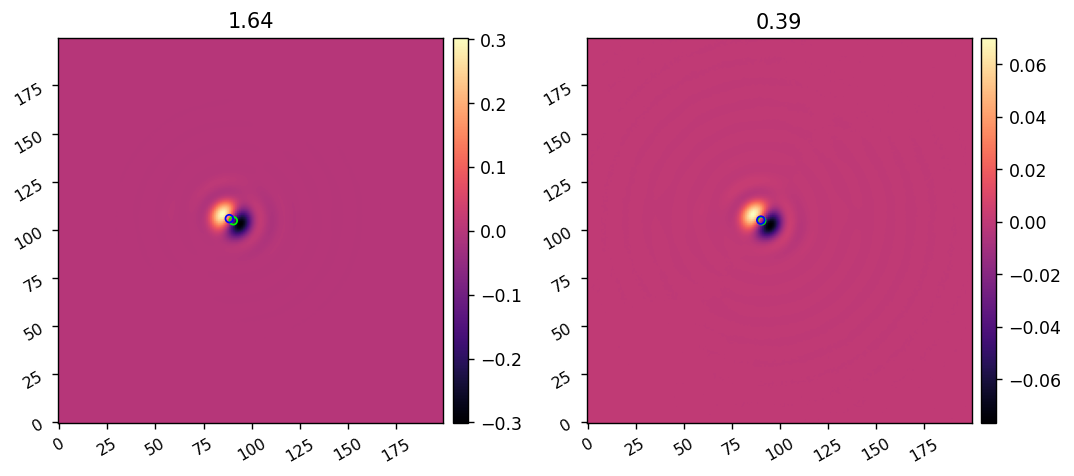

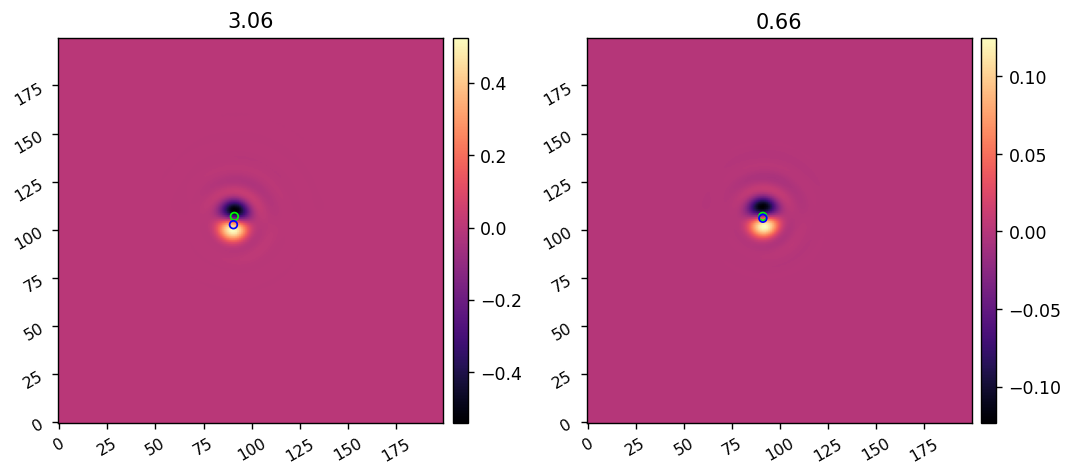

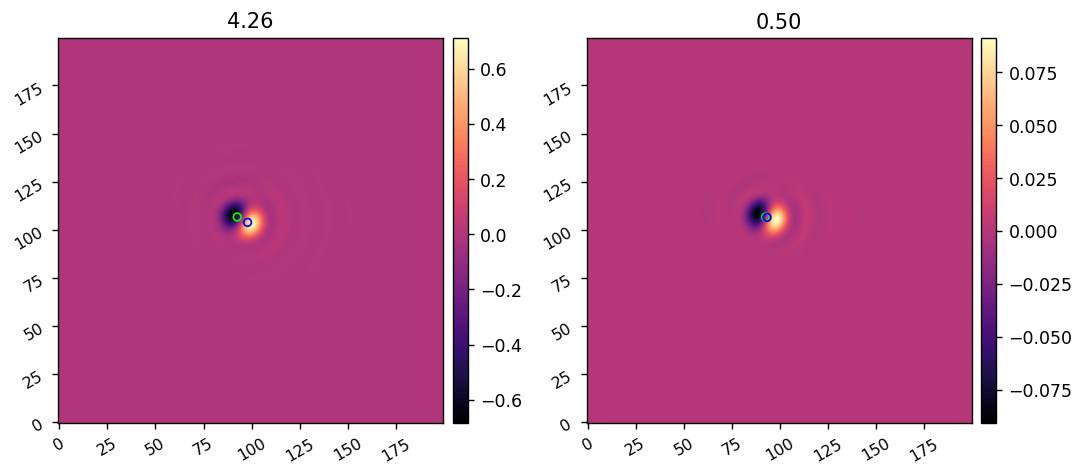

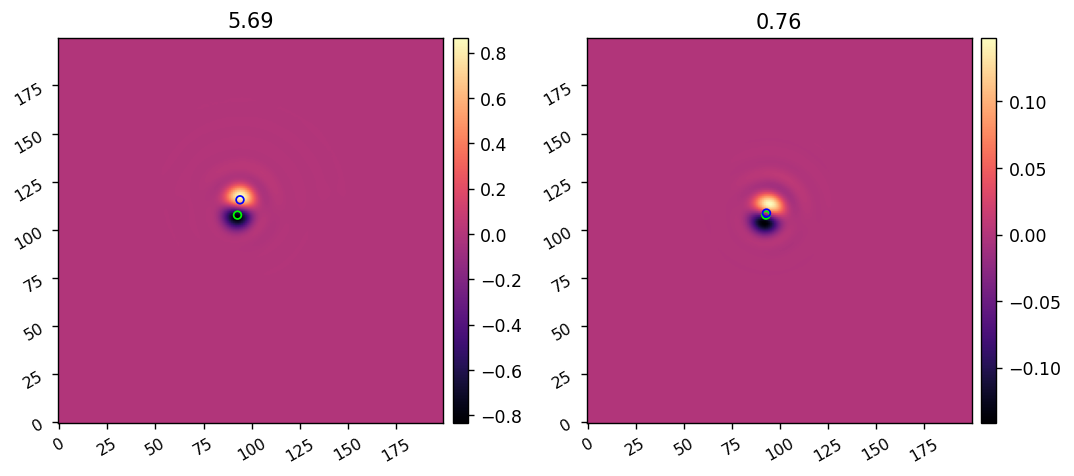

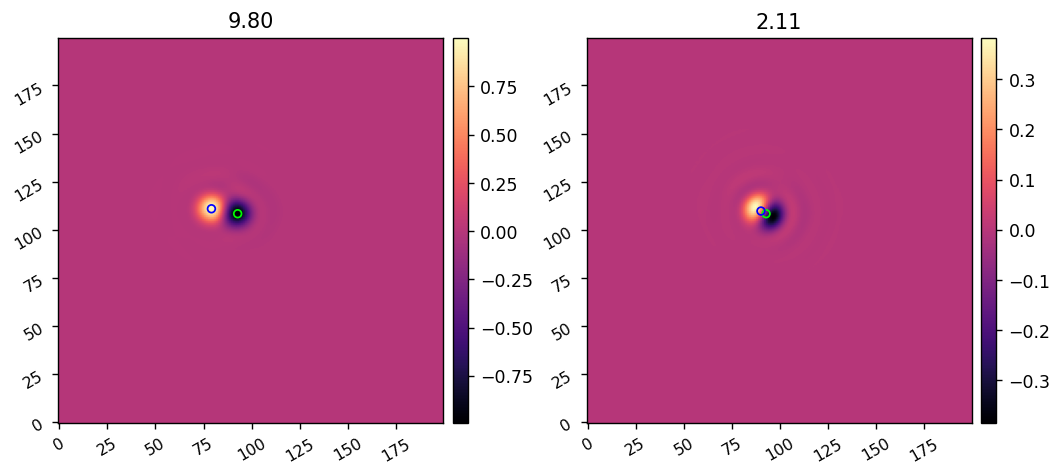

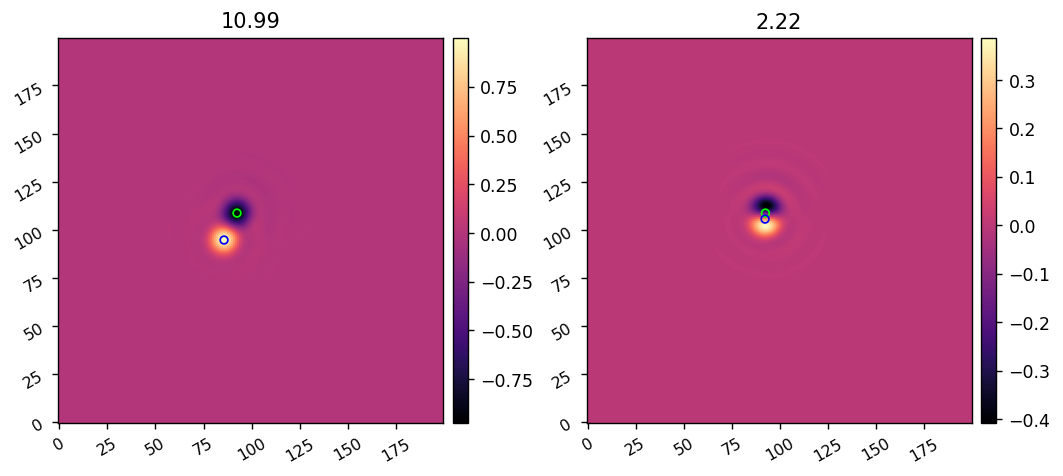

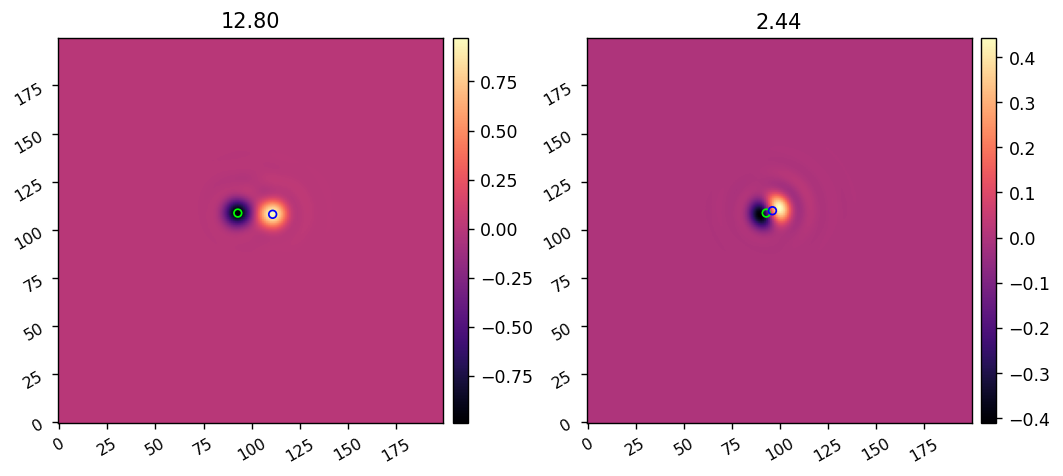

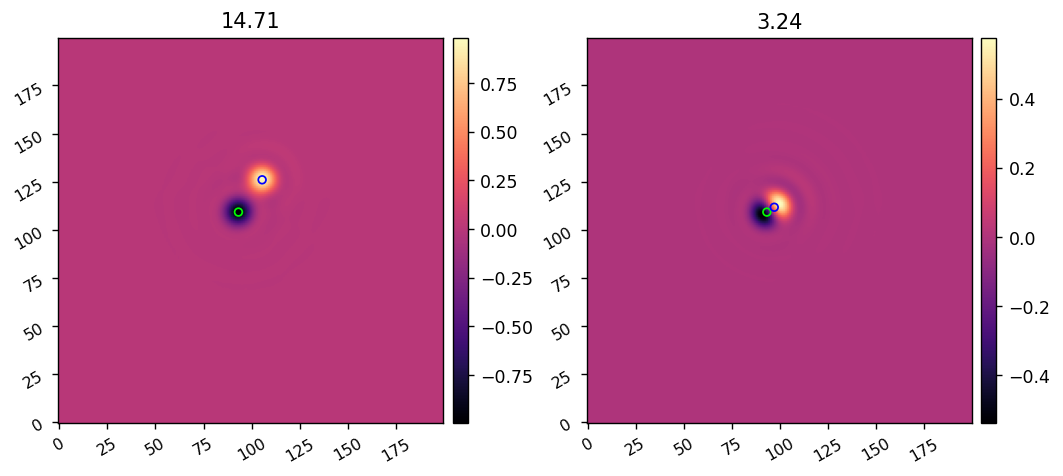

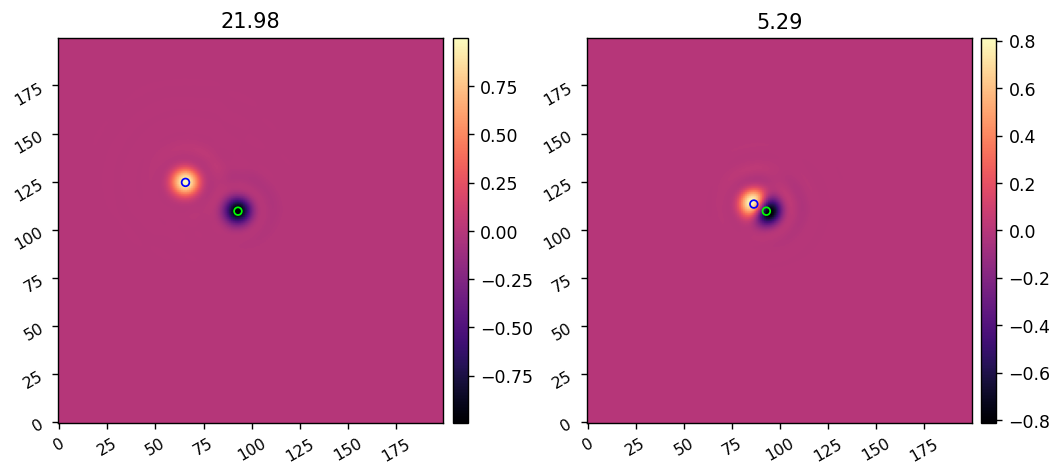

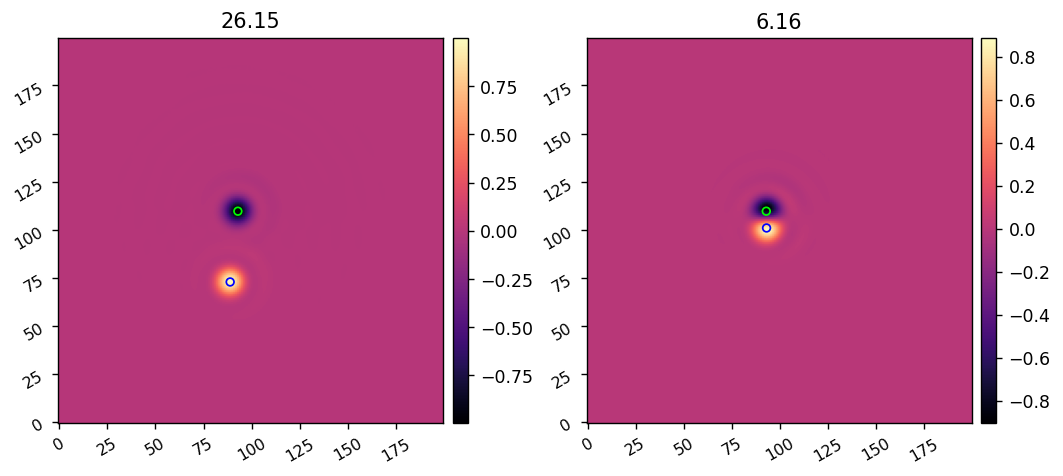

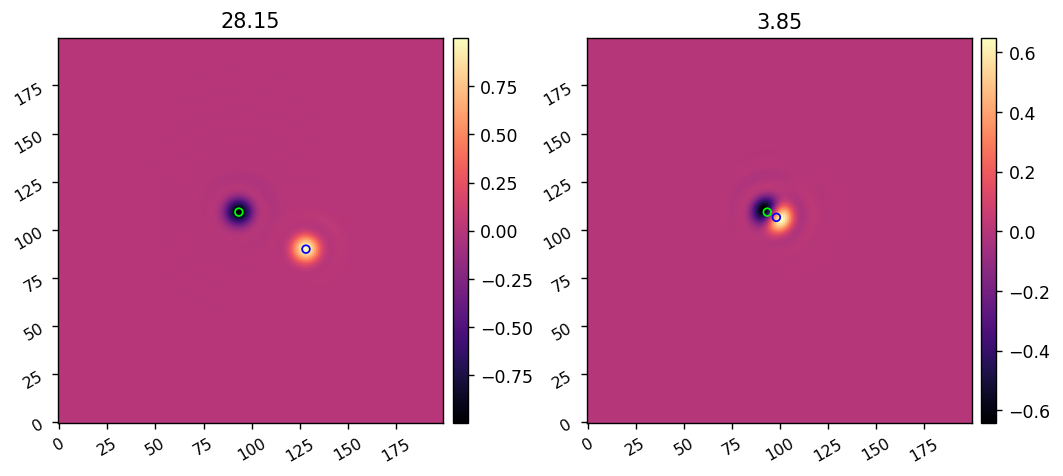

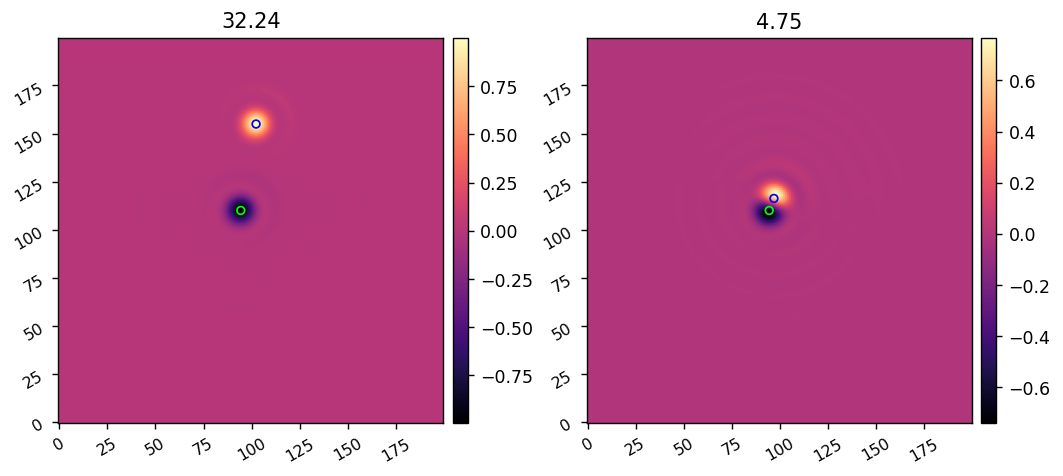

In [17]:
bias_1_cents = []
shifted_cents = []
bias_2_cents = []
total_shifts = []
bias_diffs = []
for i in range(Ns):
    bias_1_im = ims[3*i]
    shifted_im = ims[3*i + 1]
    bias_2_im = ims[3*i + 2]

    bias_1_cents.append(utils.centroid(bias_1_im, thresh=0.2, plot=False))
    shifted_cents.append(utils.centroid(shifted_im, thresh=0.2, plot=False))
    bias_2_cents.append(utils.centroid(bias_2_im, thresh=0.2, plot=False))

    total_shifts.append(np.sqrt(np.mean(np.square(shifted_cents[i] - bias_1_cents[i]))))
    bias_diffs.append(np.sqrt(np.mean(np.square(bias_2_cents[i] - bias_1_cents[i]))))

    if i%10==0: 
        imshow2(shifted_im - bias_1_im, bias_2_im-bias_1_im, 
                f'{total_shifts[i]:.2f}', f'{bias_diffs[i]:.2f}', 
                patches1=[Circle(bias_1_cents[i], 2, fill=False, color='lime'),
                          Circle(shifted_cents[i], 2, fill=False, color='blue'),],
                patches2=[Circle(bias_1_cents[i], 2, fill=False, color='lime'),
                          Circle(bias_2_cents[i], 2, fill=False, color='blue'),],
                )
    # if i==3: break


In [8]:
np.sqrt(np.mean(np.square(bias_1_cents[0] - shifted_cents[0])))

np.float64(1.6390476365168793)

In [4]:
bias_1_cents, bias_2_cents

([array([ 90.41868107, 104.71142839]),
  array([ 90.44158634, 104.73838152]),
  array([ 90.72904977, 104.93935436]),
  array([ 90.87727898, 104.93547342])],
 [array([ 89.97723193, 105.04074922]),
  array([ 90.13602968, 104.83936299]),
  array([ 90.52193426, 104.55275686]),
  array([ 90.81179578, 104.53576403])])